## ATIVIDADE DA SEMANA 14 - Para casa

### Aluna: Nargylla Fernanda Cloviel Lima

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.

In [2]:
import pandas as pd

##### Perguntas:
- Qual o meio de pagamento mais utilizado pelos consumidores?
- Quais as três categorias de produtos mais comprados?
- Há uma disparidade muito grande entre o número de compradores em São Luís - MA e o número de vendedores?
- Qual a média de nota de avaliação dada pelos compradores em 2018? 

## Limpeza dos dados

In [3]:
#Limpeza dos dados de meios de pagamentos
df_pagamento = pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-14\\on26-python-s14-analise-de-dados\\material\\dataset_olist\\dados brutos-20231104T122900Z-001\\dados brutos\\olist_order_payments_dataset.csv")
df_pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [4]:
df_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [5]:
#dropando as colunas que não serão necessárias para a análise

columns_drop = ['payment_sequential', 'payment_value']
df_pagamento = df_pagamento.drop(columns_drop, axis=1)
df_pagamento

,order_id,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,1
103882,7b905861d7c825891d6347454ea7863f,credit_card,2
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5


In [6]:
df_pagamento['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [7]:
df_pagamento = df_pagamento.reset_index(drop=True)
df_pagamento

,order_id,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,1
103882,7b905861d7c825891d6347454ea7863f,credit_card,2
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5


In [8]:
#Limpeza de dados dos produtos
df_produto = pd.read_csv('C:\\Users\\nargy\\Documents\\Estudos\\Semana-14\\on26-python-s14-analise-de-dados\\material\\dataset_olist\\dados brutos-20231104T122900Z-001\\dados brutos\\olist_products_dataset.csv')
df_produto

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
#excluindo colunas não necessárias:
columns_drop_prod = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
df_produto = df_produto.drop(columns_drop_prod, axis=1)
df_produto

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [11]:
df_produto.dropna(inplace= True) 
df_produto

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [12]:
df_produto = df_produto.reset_index(drop=True)
df_produto

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32337,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32339,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [13]:
#Limpeza de dados dos vendedores e aplicação do filtro de cidade e Estado
df_vendedores= pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-14\\on26-python-s14-analise-de-dados\\material\\dataset_olist\\dados brutos-20231104T122900Z-001\\dados brutos\\olist_sellers_dataset.csv")
df_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [14]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [15]:
df_vendedores_slz = df_vendedores[(df_vendedores["seller_city"] == "sao luis") & (df_vendedores["seller_state"] == "MA")]
df_vendedores_slz

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1930,06a2c3af7b3aee5d69171b0e14f0ee87,65072,sao luis,MA


In [16]:
#Limpeza de dados dos compradores e aplicação do filtro de cidade e Estado
df_compradores = pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-14\\on26-python-s14-analise-de-dados\\material\\dataset_olist\\dados brutos-20231104T122900Z-001\\dados brutos\\olist_customers_dataset.csv")
df_compradores

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [17]:
df_compradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
df_compradores_slz = df_compradores[(df_compradores["customer_city"] == "sao luis") & (df_compradores["customer_state"] == "MA")]
df_compradores_slz

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
38,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA
99,ad6891a1937cb8723a2c08ba1ae59873,9dbb05f5577e862337b93feb8f358839,65058,sao luis,MA
833,8ebee0cc741eb27e8501e4b4e3c6422d,8e990907b56d2383d3a39bf0cf9a3f42,65067,sao luis,MA
1058,decaeb61687071ee0fb5a7863b398032,0ff5b872dfd979e7d23064973ec52e5b,65054,sao luis,MA
1170,b28e4e1a855f322972761f8617f0be88,5e2d89be42420641aa1c19cf1a90247e,65066,sao luis,MA
...,...,...,...,...,...
98725,dfec7cb1347f76c3ce993ccde152e6f7,b0f47d39f0e55621071ec1e93ca6b74d,65071,sao luis,MA
98738,5d298dce585ab9711f691fa5c1c22ee9,0c3a1c1585e96999bdaf83732d1fe234,65076,sao luis,MA
98761,8e2abb68f8cb495763d94b8543aff049,35b58d5a4454d79f4e16dc5e1a22cac3,65072,sao luis,MA
98902,2e8e0bf9b784fb7069b6705ec26b0c87,50f0cd4b360ce6c7027e4a7055592d36,65054,sao luis,MA


In [19]:
df_compradores_slz = df_compradores_slz.reset_index(drop=True)
df_compradores_slz

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA
1,ad6891a1937cb8723a2c08ba1ae59873,9dbb05f5577e862337b93feb8f358839,65058,sao luis,MA
2,8ebee0cc741eb27e8501e4b4e3c6422d,8e990907b56d2383d3a39bf0cf9a3f42,65067,sao luis,MA
3,decaeb61687071ee0fb5a7863b398032,0ff5b872dfd979e7d23064973ec52e5b,65054,sao luis,MA
4,b28e4e1a855f322972761f8617f0be88,5e2d89be42420641aa1c19cf1a90247e,65066,sao luis,MA
...,...,...,...,...,...
348,dfec7cb1347f76c3ce993ccde152e6f7,b0f47d39f0e55621071ec1e93ca6b74d,65071,sao luis,MA
349,5d298dce585ab9711f691fa5c1c22ee9,0c3a1c1585e96999bdaf83732d1fe234,65076,sao luis,MA
350,8e2abb68f8cb495763d94b8543aff049,35b58d5a4454d79f4e16dc5e1a22cac3,65072,sao luis,MA
351,2e8e0bf9b784fb7069b6705ec26b0c87,50f0cd4b360ce6c7027e4a7055592d36,65054,sao luis,MA


In [20]:
#Limpeza de dados review
df_review = pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-14\\on26-python-s14-analise-de-dados\\material\\dataset_olist\\dados brutos-20231104T122900Z-001\\dados brutos\\olist_order_reviews_dataset.csv")
df_review	

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [21]:
columns_drop_2018 = ['review_id', 'review_comment_title', 'review_comment_message', 'review_answer_timestamp']
df_review = df_review.drop(columns_drop_2018, axis = 1)
df_review

,order_id,review_score,review_creation_date
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00
3,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00
99220,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00
99221,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00
99222,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00


In [22]:
df_review['review_creation_date'] = pd.to_datetime(df_review['review_creation_date'])
df_review['year'] = df_review['review_creation_date'].dt.strftime('%Y-%M-00')
df_review


,order_id,review_score,review_creation_date,year
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-00-00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-00-00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-00-00
3,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-00-00
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-00-00
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-00-00
99220,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-00-00
99221,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-00-00
99222,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-00-00


In [23]:
df_review = df_review[(df_review["year"]=="2018-00-00")]
df_review

,order_id,review_score,review_creation_date,year
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-00-00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-00-00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-00-00
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-00-00
5,b18dcdf73be66366873cd26c5724d1dc,1,2018-04-13,2018-00-00
...,...,...,...,...
99216,acd45245723df7cb52772a34416b41b1,3,2018-05-08,2018-00-00
99218,d699c734a0b1c8111f2272a3f36d398c,5,2018-04-27,2018-00-00
99219,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-00-00
99221,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-00-00


In [24]:
df_review.reset_index(drop = True)

,order_id,review_score,review_creation_date,year
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-00-00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-00-00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-00-00
3,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-00-00
4,b18dcdf73be66366873cd26c5724d1dc,1,2018-04-13,2018-00-00
...,...,...,...,...
56159,acd45245723df7cb52772a34416b41b1,3,2018-05-08,2018-00-00
56160,d699c734a0b1c8111f2272a3f36d398c,5,2018-04-27,2018-00-00
56161,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-00-00
56162,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-00-00


In [25]:
df_olist = pd.merge(df_review, df_pagamento, on='order_id')
df_olist

,order_id,review_score,review_creation_date,year,payment_type,payment_installments
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-00-00,credit_card,8
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-00-00,credit_card,1
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-00-00,credit_card,1
3,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-00-00,credit_card,10
4,b18dcdf73be66366873cd26c5724d1dc,1,2018-04-13,2018-00-00,credit_card,1
...,...,...,...,...,...,...
58260,acd45245723df7cb52772a34416b41b1,3,2018-05-08,2018-00-00,credit_card,2
58261,d699c734a0b1c8111f2272a3f36d398c,5,2018-04-27,2018-00-00,credit_card,10
58262,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-00-00,credit_card,8
58263,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-00-00,credit_card,6


In [26]:
df_olist.to_csv('base_final_s14_olist_Ncloviel.csv', index=False)

## Análisando os dados e respondendo as perguntas

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Qual o meio de pagamento mais utilizado pelos consumidores

df_olist["payment_type"].value_counts()

payment_type
credit_card    43566
boleto         10716
voucher         2856
debit_card      1124
not_defined        3
Name: count, dtype: int64

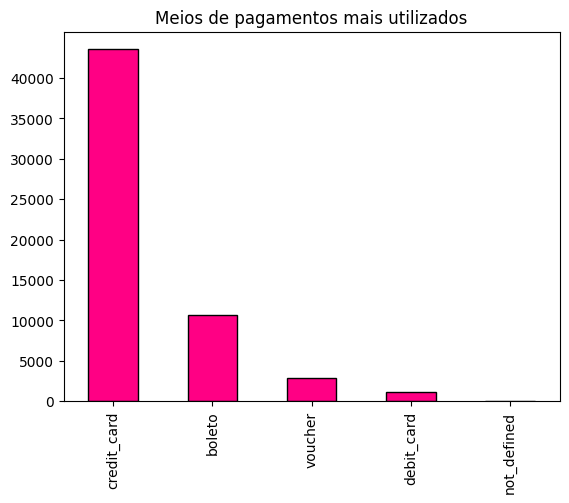

In [29]:

contagem = df_olist["payment_type"].value_counts()
contagem.plot(kind= "bar", edgecolor="black", color="#ff0084")
plt.xlabel("")
plt.title("Meios de pagamentos mais utilizados")
plt.yticks(np.arange(0, 45000, 5000))
plt.show()



In [30]:
#Quais as três categorias de produtos mais comprados?
df_produto["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

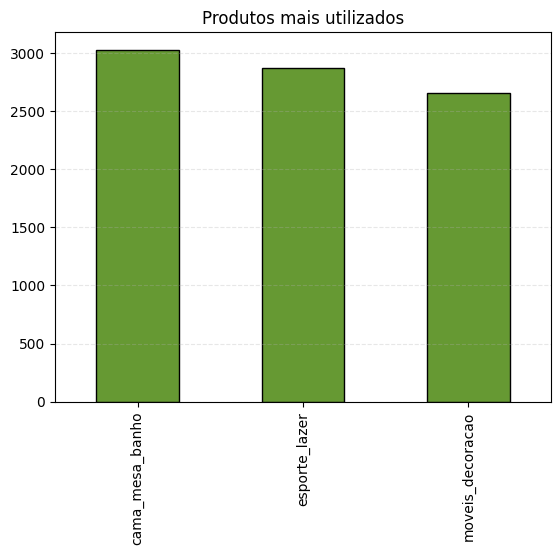

In [31]:
cont = df_produto["product_category_name"].value_counts()
filtro_count = cont.head(3)
filtro_count.plot(kind= "bar", edgecolor="black", color="#669933")
plt.xlabel("")
plt.title("Produtos mais utilizados")
plt.grid(axis= 'y', linestyle = '--', alpha = 0.3)
plt.yticks(np.arange(0, 3500, 500))
plt.show()

In [32]:
#Há uma disparidade muito grande entre o número de compradores em São Luís - MA e o número de vendedores?
df_compradores_slz['customer_city'].value_counts()

customer_city
sao luis    353
Name: count, dtype: int64

In [33]:
df_vendedores_slz.value_counts()

seller_id                         seller_zip_code_prefix  seller_city  seller_state
06a2c3af7b3aee5d69171b0e14f0ee87  65072                   sao luis     MA              1
Name: count, dtype: int64

### Nesse caso, é possível visualizar uma disparidade muito grande entre as pessoas de São Luís que compram e as pessoas que vendem. Uma proporção de 353 compradores e 1 vendedor. É possível supor que nem todos esses consumidores compram de um vendedor da própria cidade, fazendo com que o dinheiro circule para fora. Havendo, portanto, a necessidade de incentivo ao empreendedorismo local. 

In [34]:
#Qual a média e a moda de nota de avaliação dada pelos compradores em 2018? 
df_olist['review_score'].mean()

4.070591264052175

É possível observar que a Olist apresenta confiabilidade de compra, haja visto que os consumidores, em média, dão 4 estrelas para os produtos que receberam.